In [1]:
# Load libraries

import pandas as pd
import numpy as np

import missingno as msno
import statsmodels.api as sm

from fbprophet import Prophet

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

# Allows to display all of the outputs of a cell
from IPython.display import display

# Set float data type format
pd.options.display.float_format = '{:,.2f}'.format

# Set the maximum number of row to be displayed
pd.options.display.max_rows = 999

# Set global visualisation settings
plt.rc('font', size=14)  

## loading data

In [2]:
df = pd.read_csv('housing_in_london_monthly_variables.csv')
df_1 = pd.read_csv('housing_in_london_yearly_variables.csv')

display(df.head())
display(df_1.head())

date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001        17.00   
1  1995-02-01  city of london          82203  E09000001         7.00   
2  1995-03-01  city of london          79121  E09000001        14.00   
3  1995-04-01  city of london          77101  E09000001         7.00   
4  1995-05-01  city of london          84409  E09000001        10.00   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1

code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01      33,020.00   
1  E09000002  barking and dagenham  1999-12-01      21,480.00   
2  E09000003                barnet  1999-12-01      19,568.00   
3  E09000004                bexley  1999-12-01      18,621.00   
4  E09000005                 brent  1999-12-01      18,532.00   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0         6,581.00   
1                NaN       23620             3       162,444.00   
2                NaN       23128             8       313,469.00   
3                NaN       21386            18       217,458.00   
4                NaN       20911             6       260,317.00   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN        NaN           NaN             1  
3             NaN        NaN           NaN             1  
4             NaN        NaN           NaN             1

average_price  houses_sold  no_of_crimes  borough_flag
count      13,549.00    13,455.00      7,439.00     13,549.00
mean      263,519.68     3,893.99      2,158.35          0.73
std       187,617.50    12,114.40        902.09          0.44
min        40,722.00         2.00          0.00          0.00
25%       132,380.00       247.00      1,623.00          0.00
50%       222,919.00       371.00      2,132.00          1.00
75%       336,843.00     3,146.00      2,582.00          1.00
max     1,463,378.00   132,163.00      7,461.00          1.00

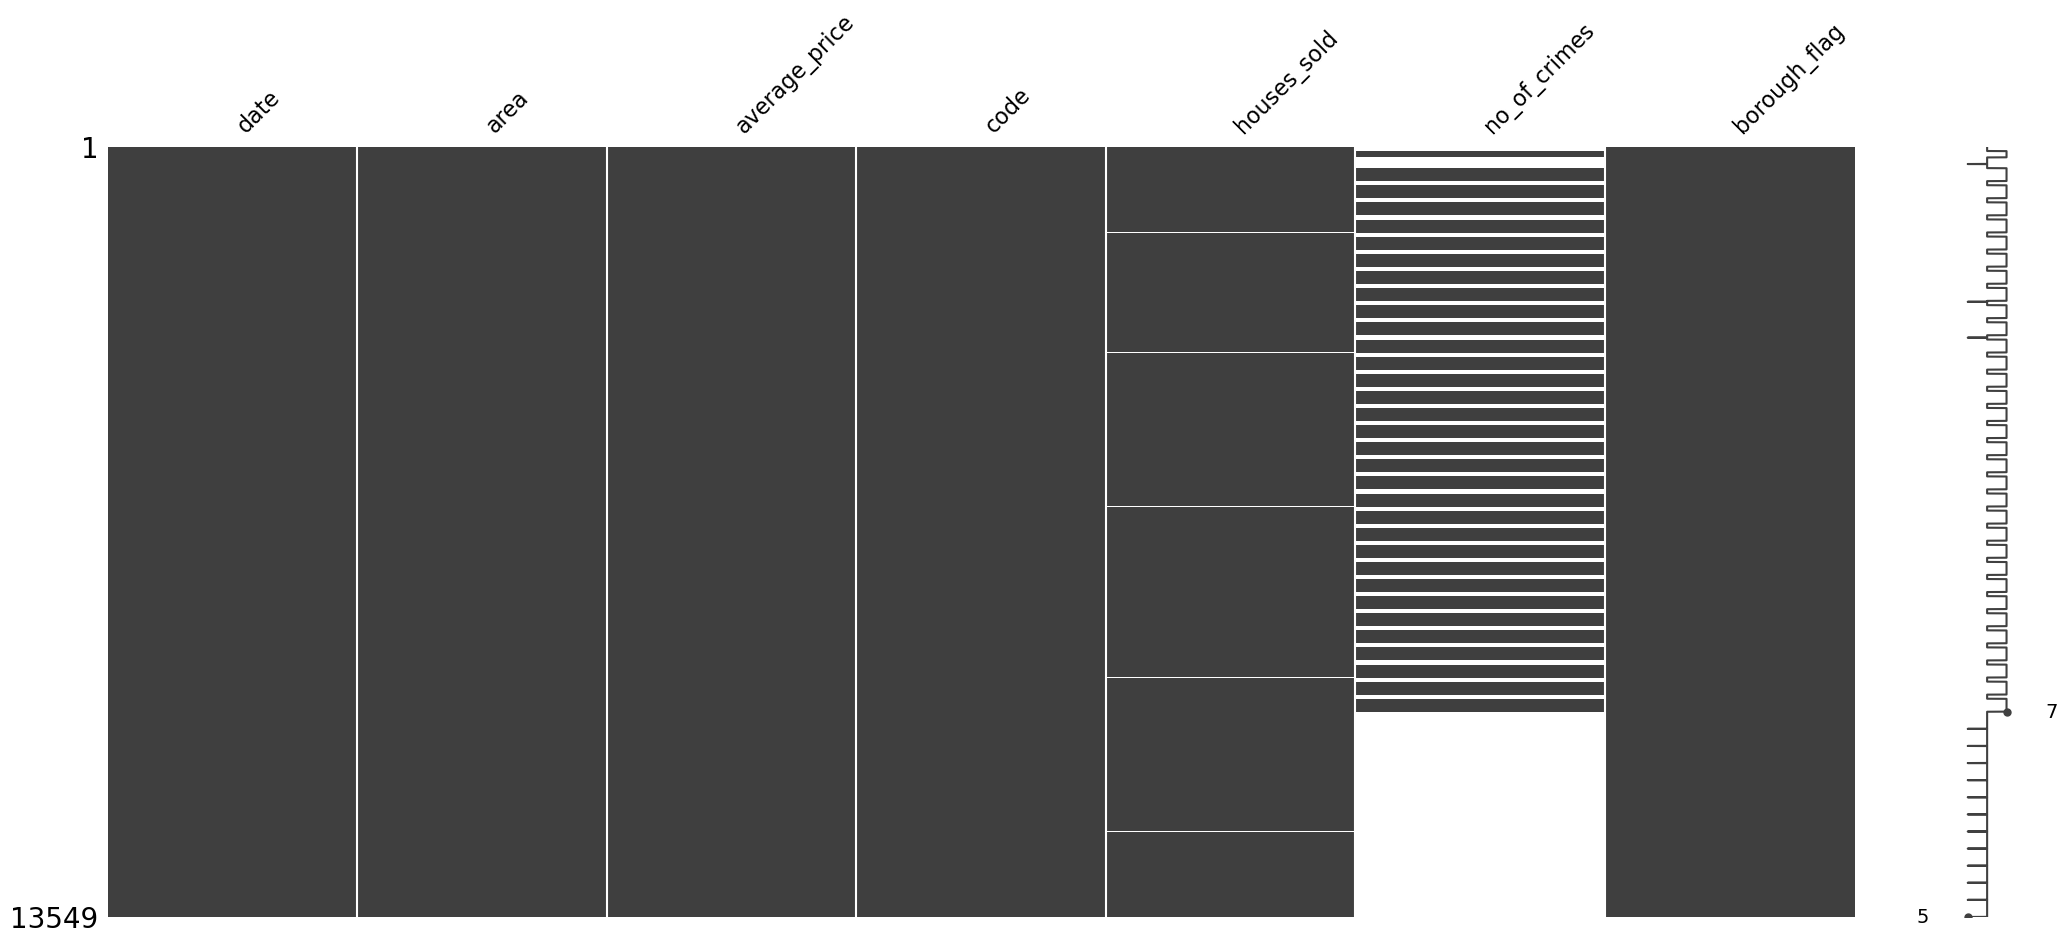

In [3]:
display(df.describe());

msno.matrix(df);

median_salary  life_satisfaction  population_size  number_of_jobs  \
count       1,049.00             352.00         1,018.00          931.00   
mean       27,977.79               7.49     6,042,576.49    3,188,094.52   
std         6,412.81               0.20    15,268,096.56    8,058,302.24   
min        15,684.00               7.00         6,581.00       47,000.00   
25%        23,857.00               7.35       224,345.75       94,500.00   
50%        27,441.00               7.51       294,603.50      157,000.00   
75%        30,932.00               7.64     4,630,098.50    2,217,000.00   
max        61,636.00               7.96    66,435,550.00   35,750,000.00   

          area_size  no_of_houses  borough_flag  
count        666.00        666.00      1,071.00  
mean     372,490.27    881,468.15          0.65  
std    2,157,060.24  3,690,376.14          0.48  
min          315.00      5,009.00          0.00  
25%        2,960.00     87,635.50          0.00  
50%        4,323.00    102,402.00          1.00  
75%        8,220.00    126,276.00          1.00  
max   13,303,728.00 24,172,166.00          1.00

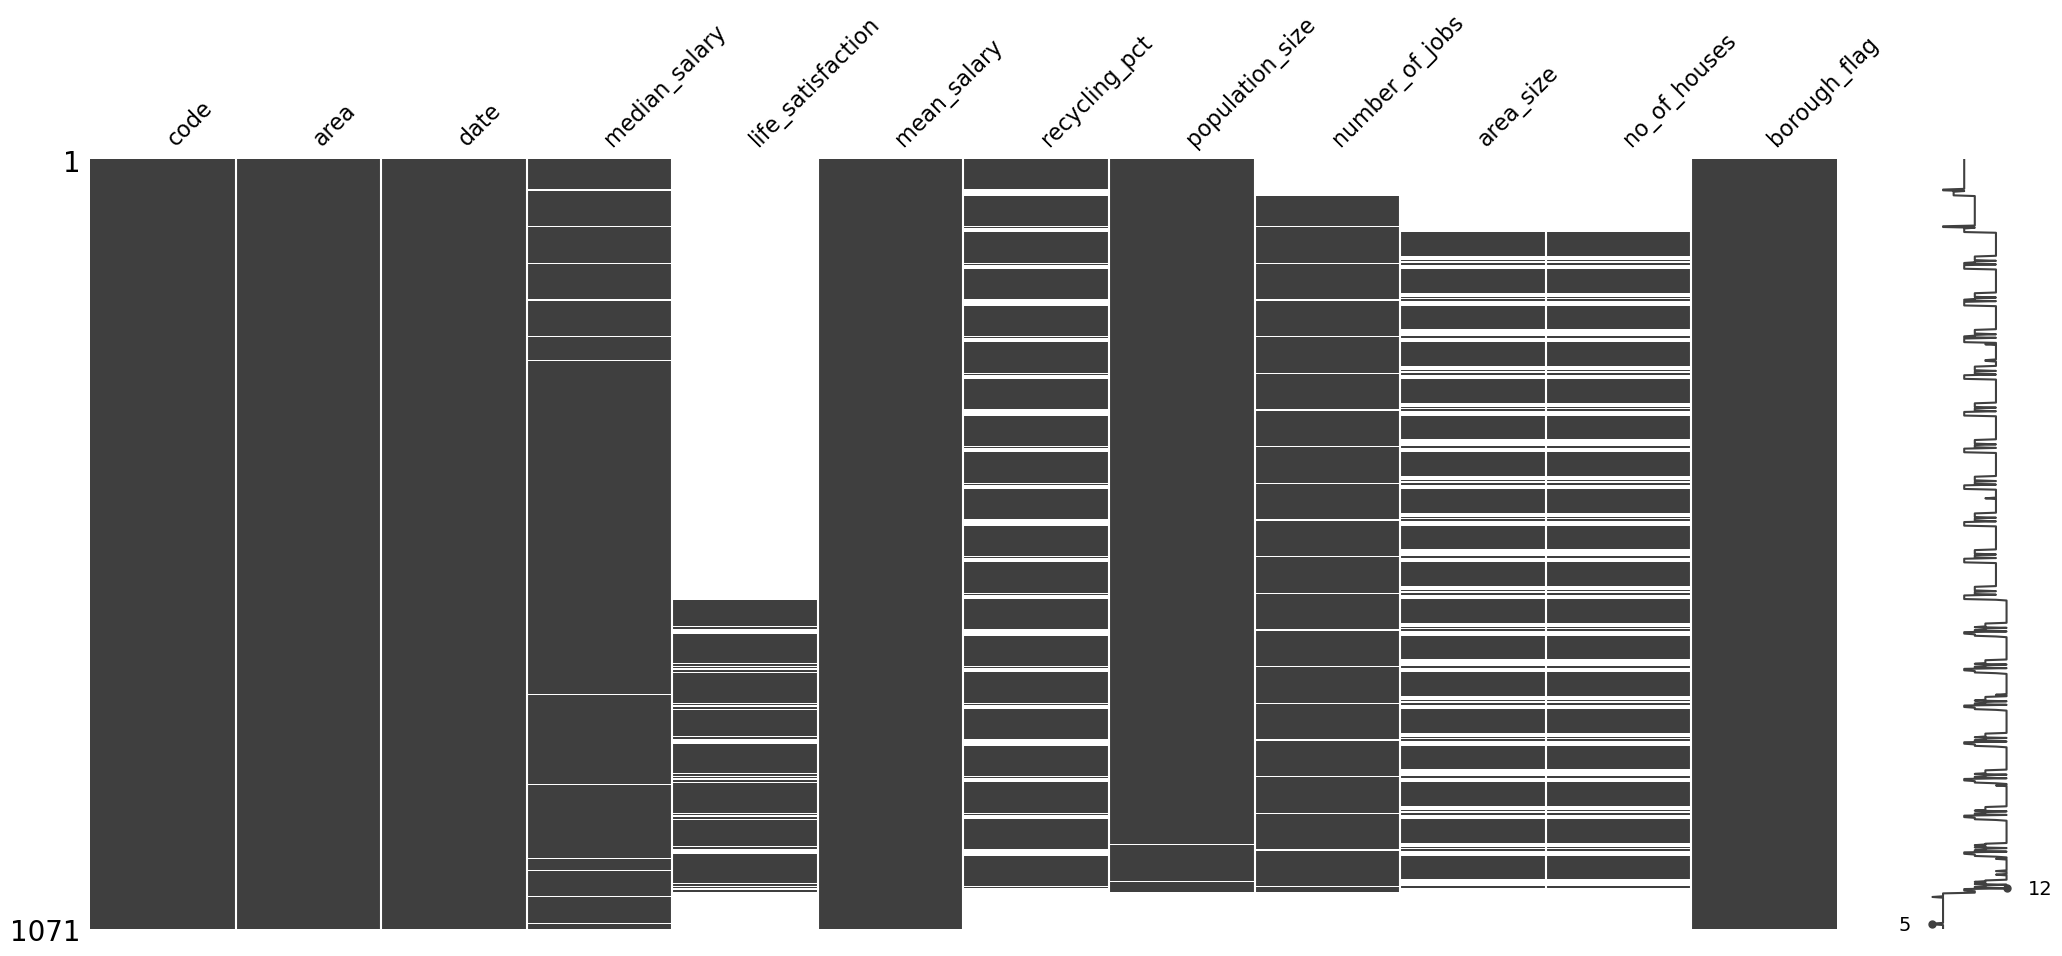

In [4]:
display(df_1.describe())

msno.matrix(df_1);

## exploring data

### housing_in_london_yearly_variables

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [6]:
df_1.groupby('mean_salary')['mean_salary'].count().sort_values(ascending=False)
# as info shows the type of mean_salary is object and I have checked the most repeated values that probably is character

mean_salary
-        10
#         7
29407     2
33568     2
27736     2
         ..
29842     1
29854     1
29869     1
29901     1
90842     1
Name: mean_salary, Length: 1041, dtype: int64

In [7]:
# it is a object - the main goal in this step is changing all string to numeric
df_1.groupby('recycling_pct')['mean_salary'].count().sort_values(ascending=False)
df_1['recycling_pct'] = df_1['recycling_pct'].replace('na', np.NaN)
df_1['recycling_pct'] = df_1['recycling_pct'].replace('-', np.NaN)
df_1['recycling_pct'] = df_1['recycling_pct'].replace('#', np.NaN)
df_1['recycling_pct'] = df_1['recycling_pct'].astype(float)

In [8]:
# Set date as index for easier manipulation
df = df.set_index(pd.to_datetime(df['date']))
df_1 = df_1.set_index(pd.to_datetime(df_1['date']))

del df['date']
del df_1['date']

# There are some NaN values that fill with special ccharacters and we need to find them and replace them with NaN to continue
df_1['mean_salary'] = df_1['mean_salary'].replace('-', np.NaN)
df_1['mean_salary'] = df_1['mean_salary'].replace('#', np.NaN)
df_1['mean_salary'] = df_1['mean_salary'].astype(float)


In [9]:
df_1.info() # except code and area that they originally are string others change to float or int

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071 entries, 1999-12-01 to 2019-12-01
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   median_salary      1049 non-null   float64
 3   life_satisfaction  352 non-null    float64
 4   mean_salary        1054 non-null   float64
 5   recycling_pct      859 non-null    float64
 6   population_size    1018 non-null   float64
 7   number_of_jobs     931 non-null    float64
 8   area_size          666 non-null    float64
 9   no_of_houses       666 non-null    float64
 10  borough_flag       1071 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 100.4+ KB


array([[<AxesSubplot: title={'center': 'median_salary'}>,
        <AxesSubplot: title={'center': 'life_satisfaction'}>,
        <AxesSubplot: title={'center': 'mean_salary'}>],
       [<AxesSubplot: title={'center': 'recycling_pct'}>,
        <AxesSubplot: title={'center': 'population_size'}>,
        <AxesSubplot: title={'center': 'number_of_jobs'}>],
       [<AxesSubplot: title={'center': 'area_size'}>,
        <AxesSubplot: title={'center': 'no_of_houses'}>,
        <AxesSubplot: title={'center': 'borough_flag'}>]], dtype=object)

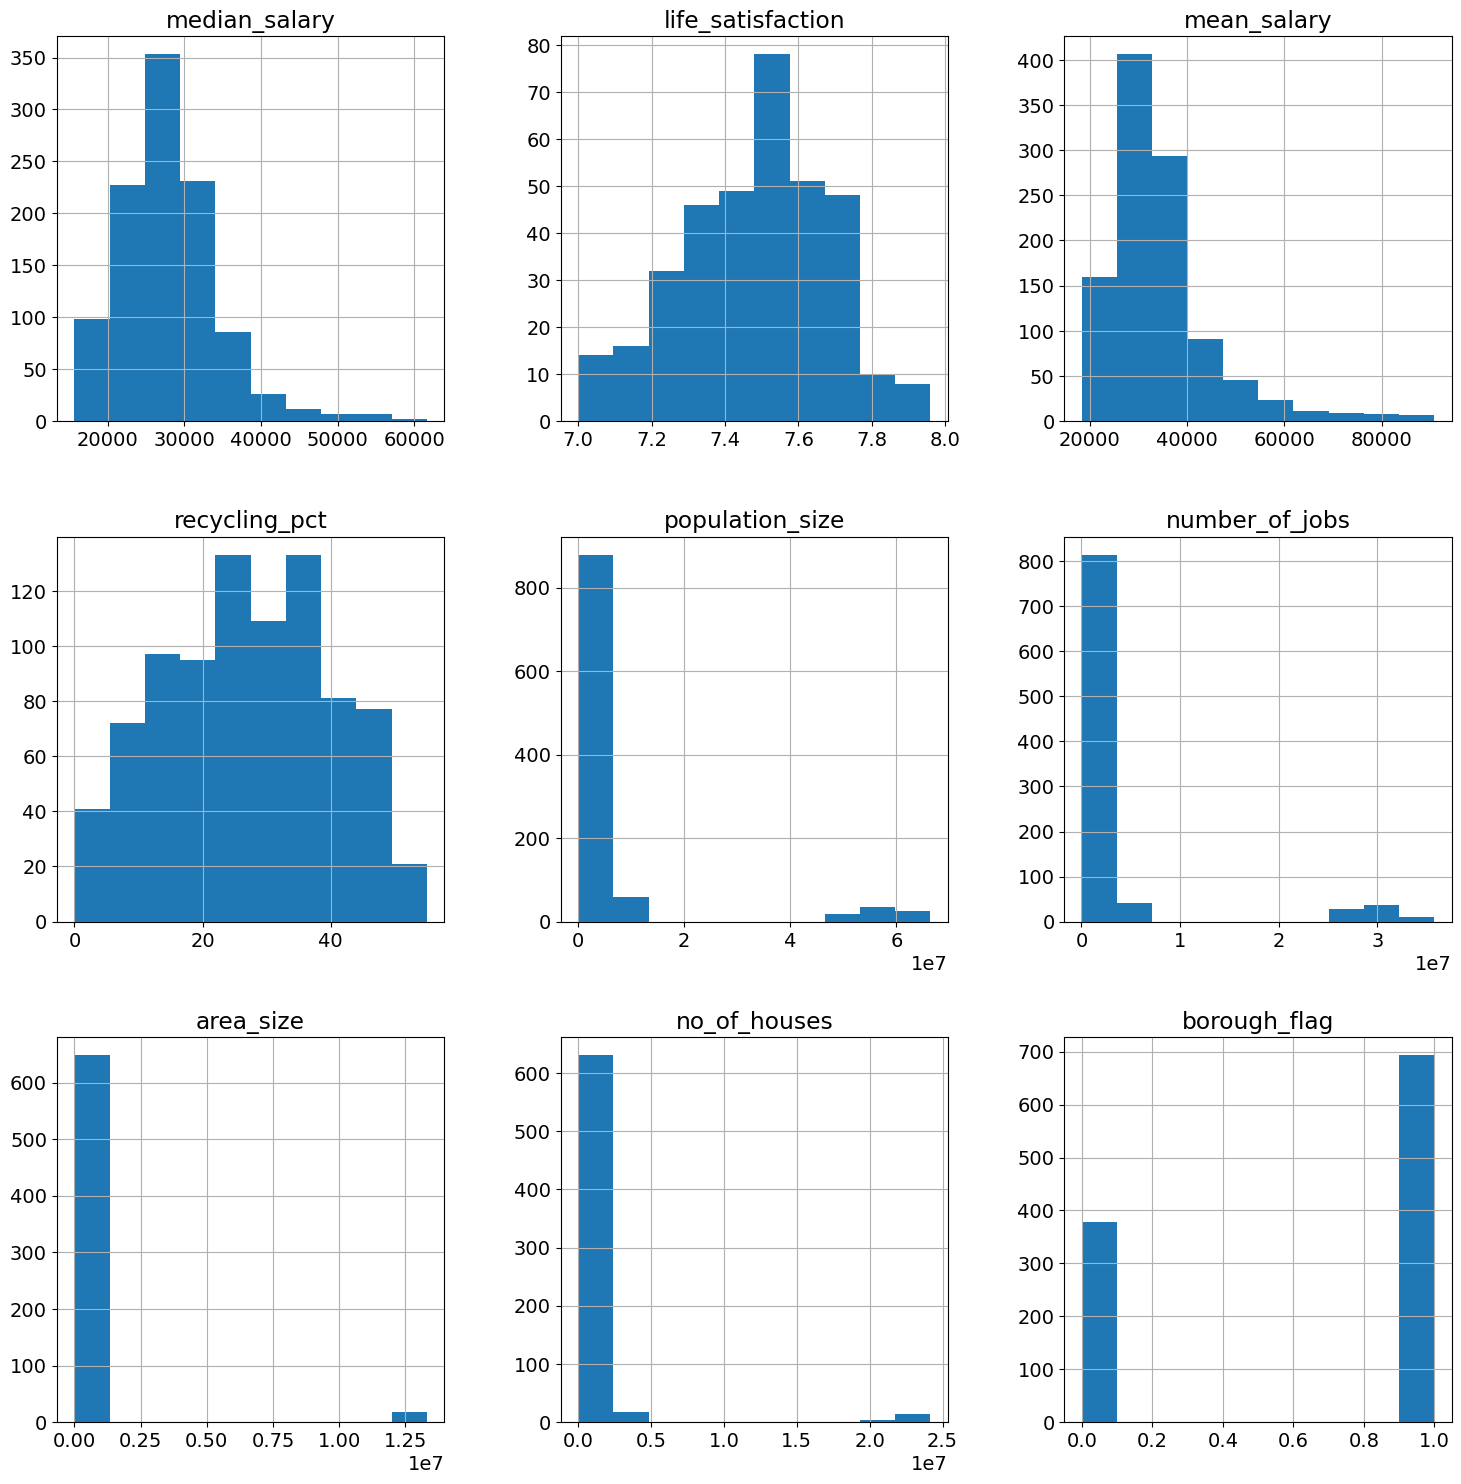

In [10]:
df_1.hist(figsize = (18,18))

borough_flag is binary and distribution of life_satisfaction is normal

Text(0.5, 1.0, 'borough_flag distribution graph in yearly')

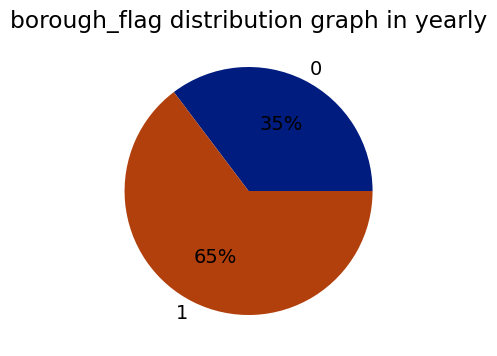

In [11]:
palette_color = sns.color_palette('dark')
plt.figure(figsize=(4,6))
plt.pie(df_1.groupby('borough_flag')['borough_flag'].count(),labels=df_1.groupby('borough_flag')['borough_flag'].count().index,
        colors=palette_color, autopct='%.0f%%')
plt.title('borough_flag distribution graph in yearly')


Text(0.5, 1.0, 'mean salary based on area in yearly for out of borough')

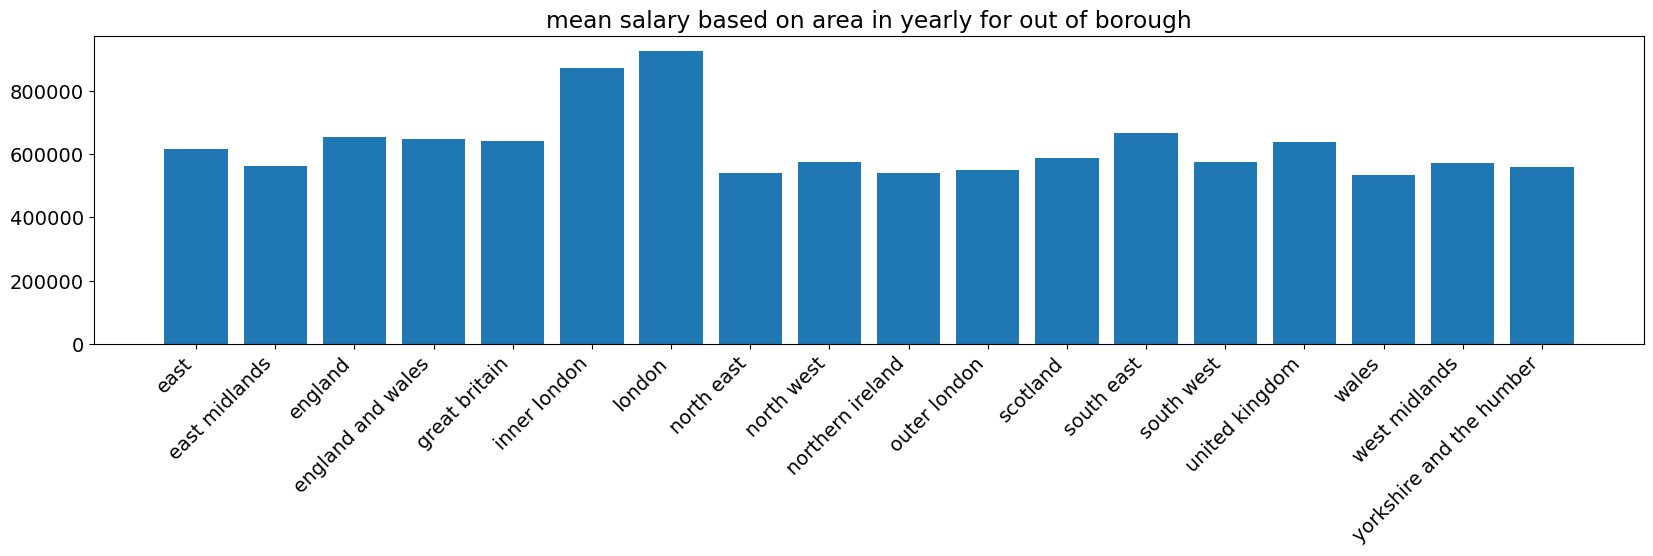

In [28]:
y_area_labels = df_1[df_1.borough_flag==0].groupby('area')['mean_salary'].sum().index
y_area_values = df_1[df_1.borough_flag==0].groupby('area')['mean_salary'].sum().values
plt.figure(figsize=(20,4))
plt.bar(y_area_labels, height=y_area_values)
plt.xticks(rotation=45, ha='right')
plt.title('mean salary based on area in yearly for out of borough')

Text(0.5, 1.0, 'mean salary based on area in yearly for london')

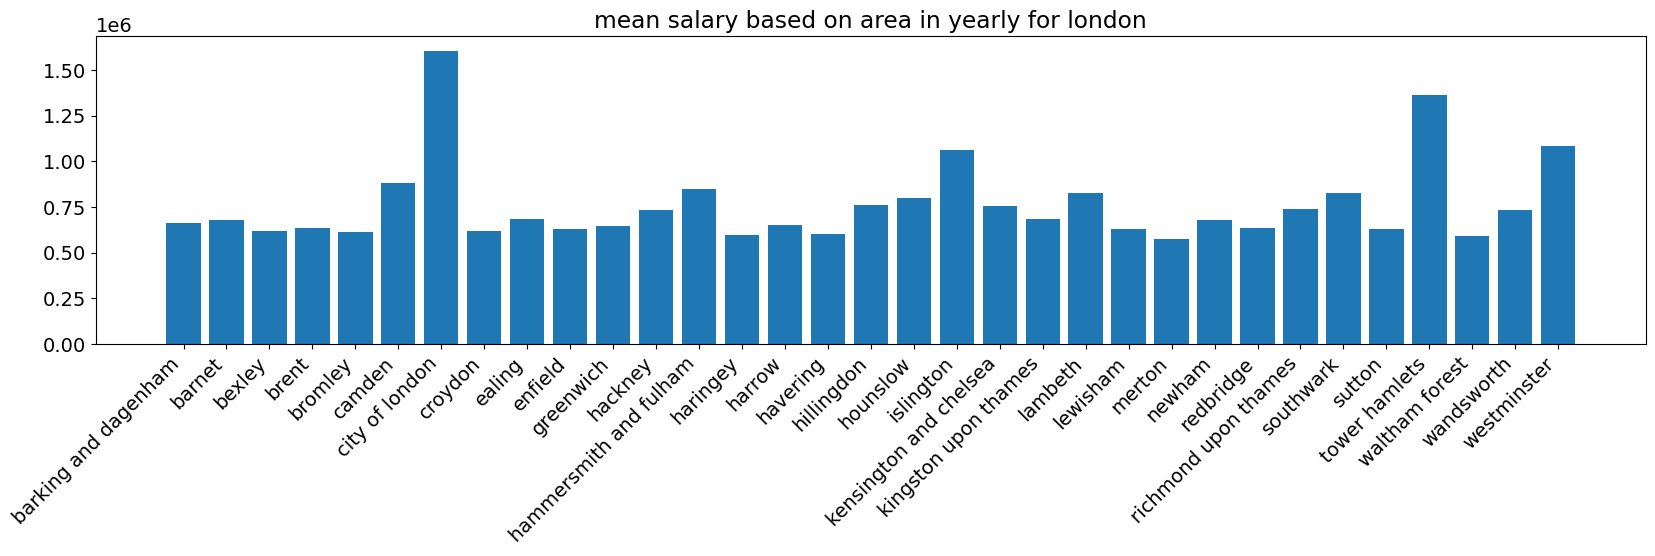

In [27]:
y_area_labels = df_1[df_1.borough_flag==1].groupby('area')['mean_salary'].sum().index
y_area_values = df_1[df_1.borough_flag==1].groupby('area')['mean_salary'].sum().values
plt.figure(figsize=(20,4))
plt.bar(y_area_labels, height=y_area_values)
plt.xticks(rotation=45, ha='right')
plt.title('mean salary based on area in yearly for london')

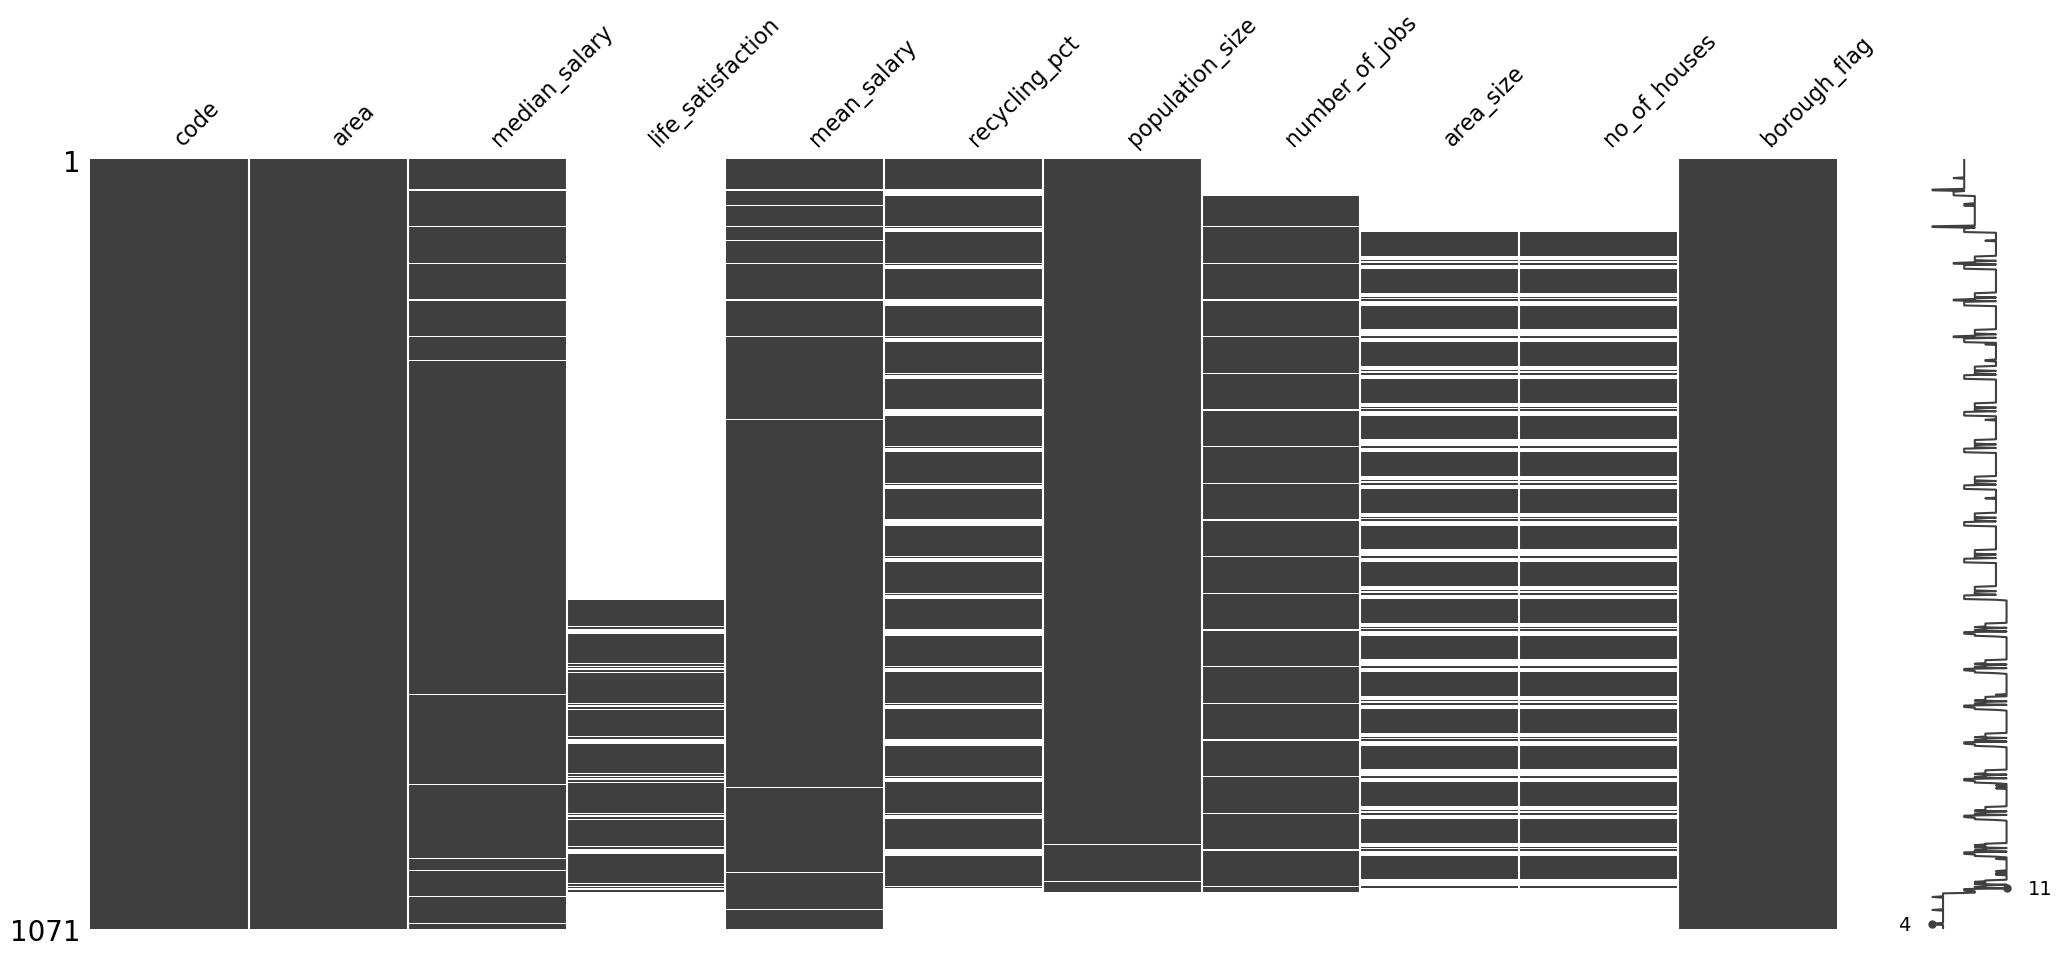

In [29]:
msno.matrix(df_1);

### housing_in_london_monthly_variables

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13549 entries, 1995-01-01 to 2020-01-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           13549 non-null  object 
 1   average_price  13549 non-null  int64  
 2   code           13549 non-null  object 
 3   houses_sold    13455 non-null  float64
 4   no_of_crimes   7439 non-null   float64
 5   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 741.0+ KB


In [49]:
# creating area around England
df_england_area = df[df.area.str.contains('north')|df.area.str.contains('south')|df.area.str.contains('east')
                    |df.area.str.contains('midlands')].groupby('area').area.count().index
list(df_england_area).remove('southwark')
df_area_around_england = df.loc[df.area.isin(list(df_england_area))]

In [50]:
around_england_mean_price = df_area_around_england.groupby('date')['average_price'].mean()

In [51]:
# Create dataset cuts
# put all area with borough_flag equal to 1
prices_london = df[df['borough_flag'] == 1]
prices_england = df[df['area'] == 'england']
prices_north_east = df[df['area'] == 'north east']

# Calcualte mean prices for the different cuts of data
london_mean_price = prices_london.groupby('date')['average_price'].mean()
england_mean_price = prices_england.groupby('date')['average_price'].mean()
north_east_mean_price = prices_north_east.groupby('date')['average_price'].mean()

print('Processing Complete')

Processing Complete


In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=london_mean_price.index, 
                         y=london_mean_price.values,
                         mode='lines',
                         name='London Mean House Price',
                        ))

fig.add_trace(go.Scatter(x=england_mean_price.index, 
                         y=england_mean_price.values,
                         mode='lines',
                         name='England Mean House Price',
                        ))

fig.add_trace(go.Scatter(x=north_east_mean_price.index, 
                         y=north_east_mean_price.values,
                         mode='lines',
                         name='North East Mean House Price',
                        ))


fig.update_layout(
    template='gridon',
    title='Average Monthly House Price',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    legend=dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="line",
            x0='2016-06-01',
            x1='2016-06-01',
            y0=0,
            y1=london_mean_price.values.max()*1.2,
            line=dict(
            color="LightSalmon",
            dash="dashdot"
            )
        ),
        dict(
            type="rect",
            x0="2007-12-01",
            y0=0,
            x1="2009-06-01",
            y1=london_mean_price.values.max()*1.2,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            x0="2001-03-01",
            y0=0,
            x1="2001-11-01",
            y1=london_mean_price.values.max()*1.2,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    ],
    annotations=[
            dict(text="The Great Recession", x='2007-12-01', y=london_mean_price.values.max()*1.2),
            dict(text="Brexit Vote", x='2016-06-01', y=london_mean_price.values.max()*1.2),
            dict(text="Dot-Com Bubble Recession", x='2001-03-01', y=london_mean_price.values.max()*1.2)
    ]
)

fig.show()

In [53]:
fig = px.line(prices_london, x=prices_london.index, y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

In [64]:
prices_out_flag = df[df['borough_flag'] == 0]

fig = px.line(prices_out_flag, x=prices_out_flag.index, y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly no Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

In [68]:
fig = px.line(df_area_around_england, x=df_area_around_england.index, y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly around England',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

Text(0.5, 1.0, 'borough_flag distribution graph in monthly')

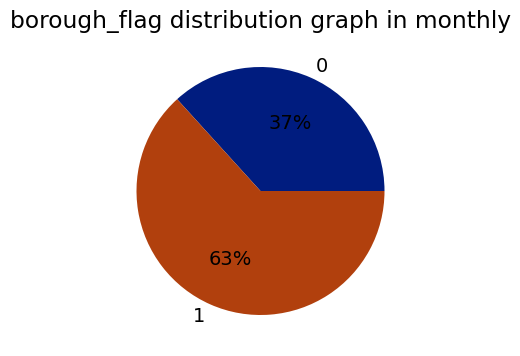

In [65]:
palette_color = sns.color_palette('dark')
plt.figure(figsize=(4,6))
plt.pie(df.groupby('borough_flag')['average_price'].mean('average_price'),
        labels=df.groupby('borough_flag')['average_price'].mean('average_price').index, colors=palette_color, autopct='%.0f%%')
plt.title('borough_flag distribution graph in monthly')

In [55]:
# Calculate the mean yearly price per borough
yearly_prices_london = prices_london.groupby('area').resample('y')['average_price'].mean()

# Calculate the yealy average price percentage change
yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: x.pct_change())

yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.unstack()
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.iloc[::-1]

del yearly_prices_london_pct_ch['1995-12-31']

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\3059760796.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [56]:
fig = go.Figure(data=go.Heatmap(
        z=yearly_prices_london_pct_ch.values,
        x=yearly_prices_london_pct_ch.columns,
        y=yearly_prices_london_pct_ch.index,
        colorscale='Cividis'))

fig.update_layout(
    title='YoY Average London House Price Percentage Change',
    title_x=0.5,
    yaxis_nticks=33,
    xaxis_title='Year',
    yaxis_title='Borough'
)

fig.show()

In [57]:
# Load the shape file for mapping
# you can download London_Borough_Excluding_MHW from, https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip
map_df = gpd.read_file('London_Borough_Excluding_MHW\London_Borough_Excluding_MHW.shp')

map_df = map_df[['NAME', 'geometry']]
map_df = map_df.rename(columns={'NAME': 'area'})
map_df['area'] = map_df['area'].str.lower()
map_df['area'] = map_df['area'].str.replace('&','and')

yearly_prices_london_df_map = pd.DataFrame(yearly_prices_london)
yearly_prices_london_df_map = yearly_prices_london_df_map.reset_index()

price_map = map_df.set_index('area').join(yearly_prices_london_df_map.set_index('area'))
price_map = price_map.reset_index()

price_map = price_map[price_map['date'] == '2019-12-31']

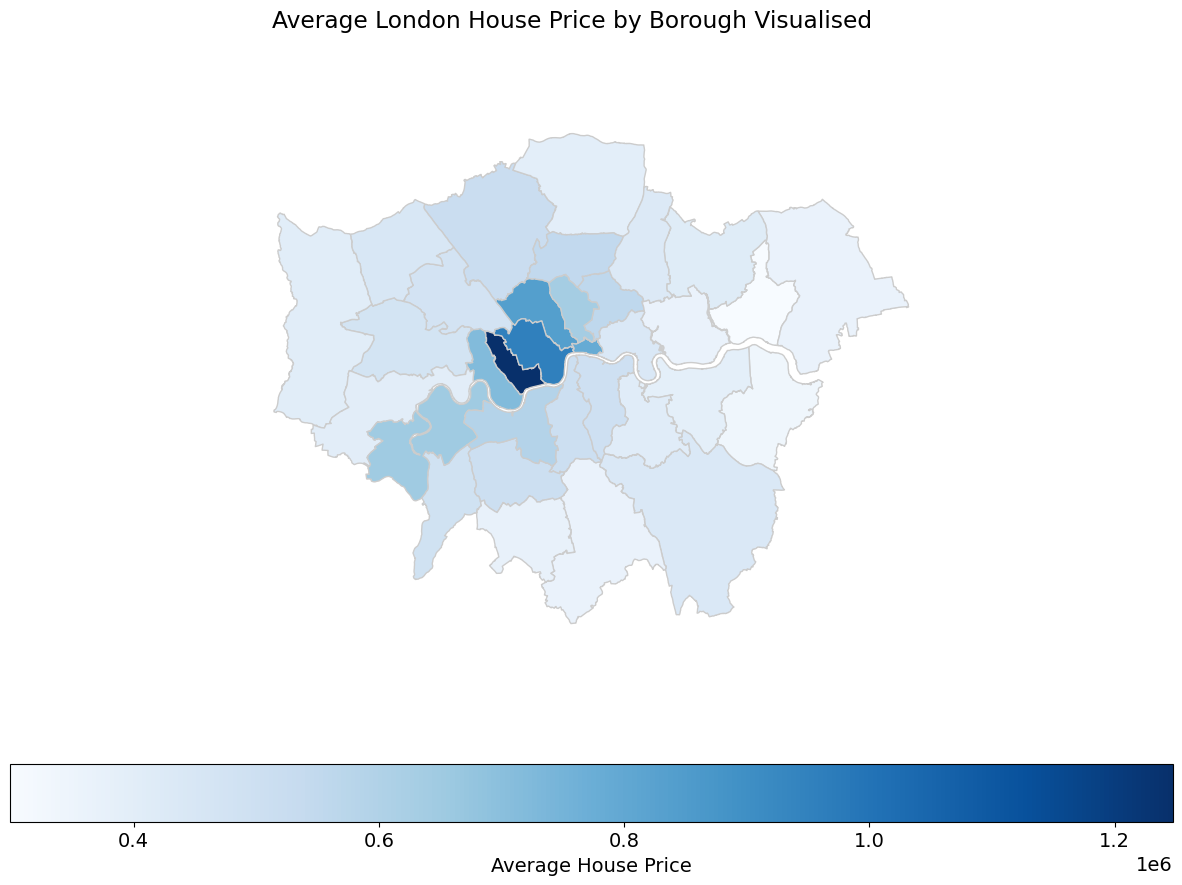

In [58]:
variable = 'average_price'

fig, ax = plt.subplots(1, figsize=(15, 10))
price_map.plot(column=variable, 
               cmap='Blues', 
               linewidth=1, 
               ax=ax, 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Average House Price",
                           'orientation': "horizontal"})
ax.axis('off')
plt.suptitle('Average London House Price by Borough Visualised')
plt.show()

In [59]:
london_mean_values = prices_london.groupby('area').resample('y').mean().reset_index()
df_1 = df_1.groupby('area').resample('y').mean().reset_index()
london_mean_values = pd.merge(london_mean_values, df_1, on=['area', 'date'], how='left')

del london_mean_values['borough_flag_x']
del london_mean_values['borough_flag_y']

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipy

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipy

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\849368636.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipy

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\1507295534.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Mehrad Tavanamehr\AppData\Local\Temp\ipykernel_29844\1507295534.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



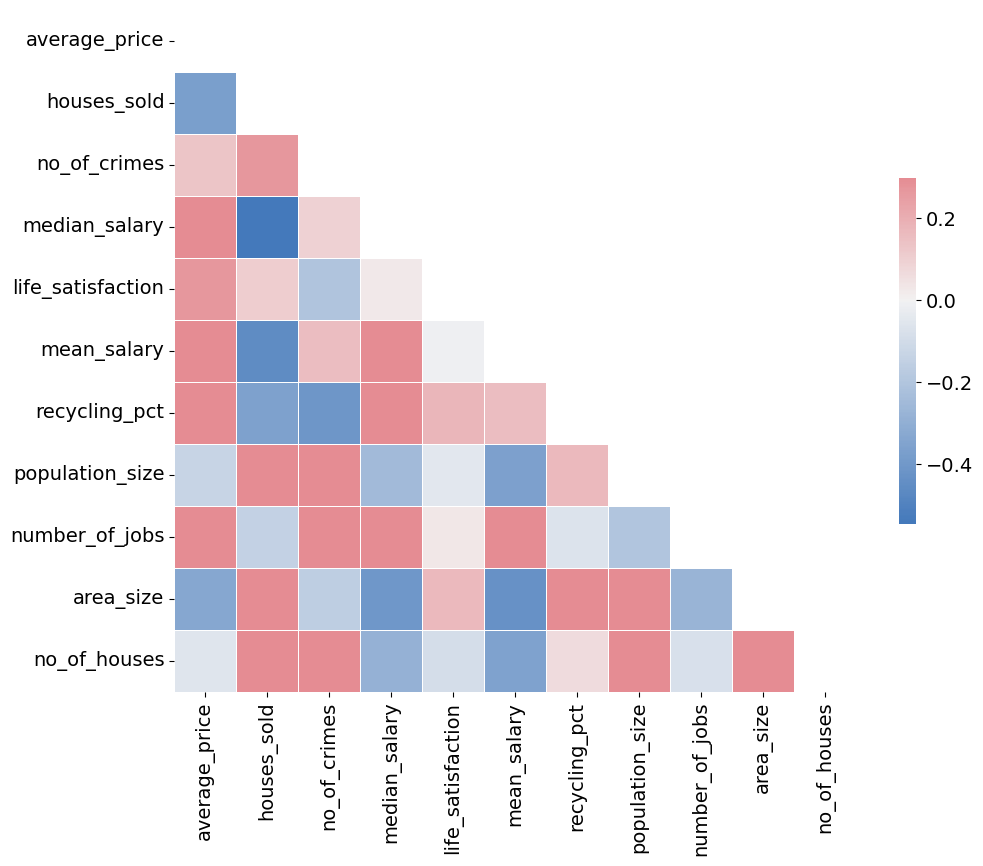

In [60]:
# Compute the correlation matrix
corr = london_mean_values.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

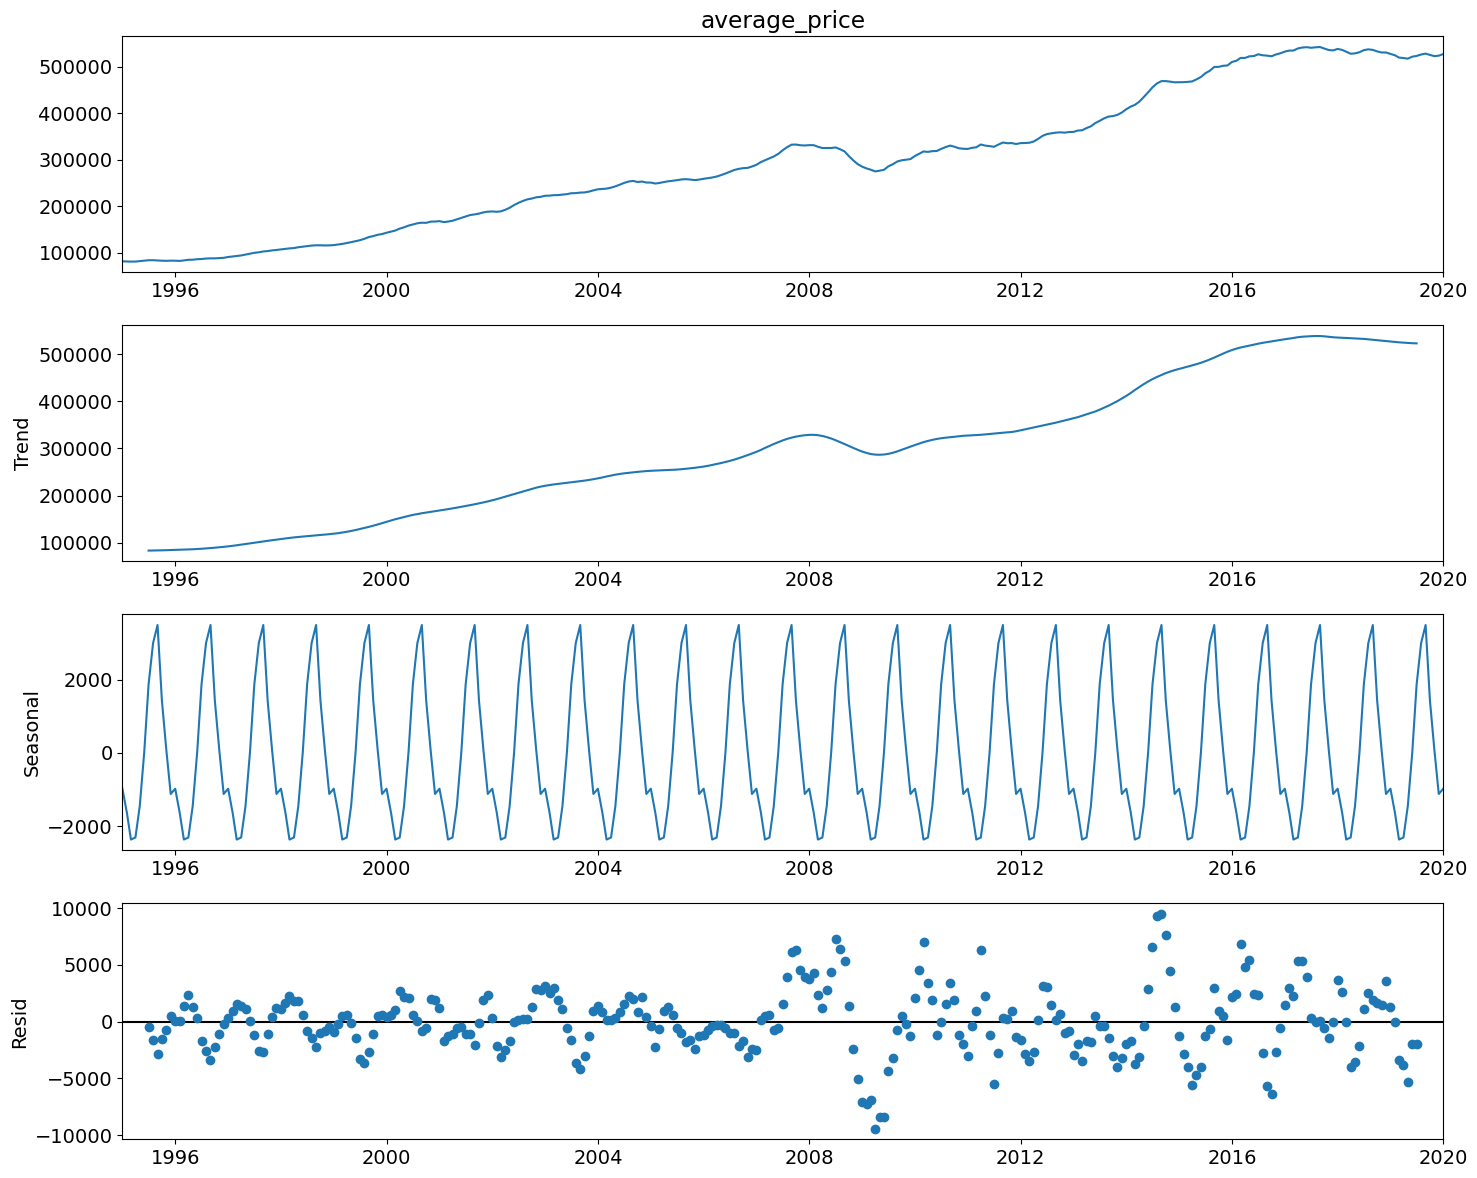

In [61]:
decomposition = sm.tsa.seasonal_decompose(london_mean_price, model='additive')
fig = decomposition.plot()
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



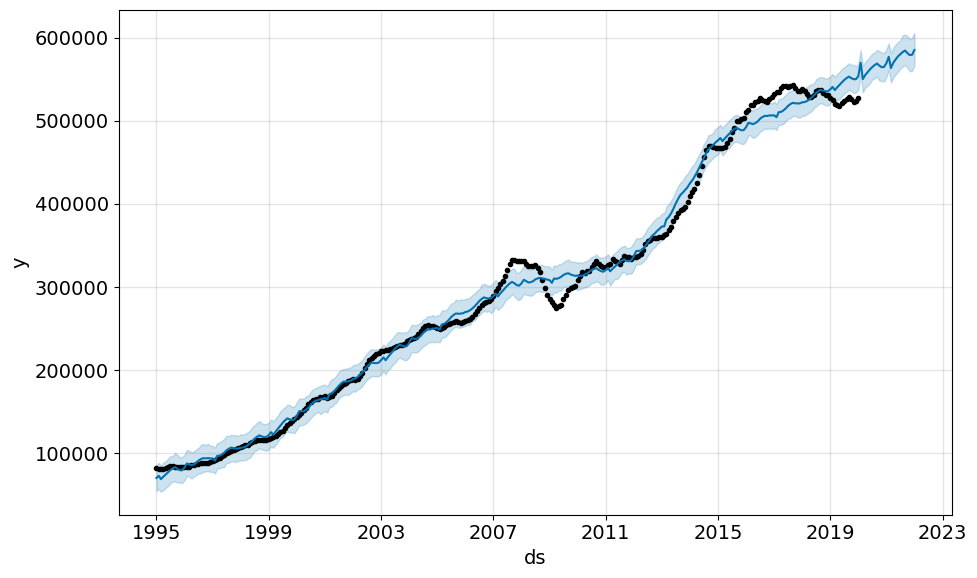

In [62]:
# Prepare the 
model_df = pd.DataFrame(london_mean_price).reset_index()
model_df = model_df.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m = Prophet()
m.fit(model_df)

future = m.make_future_dataframe(periods=24, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig1 = m.plot(forecast)

In [70]:
out_flag_mean_price = prices_out_flag.groupby('date')['average_price'].mean()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



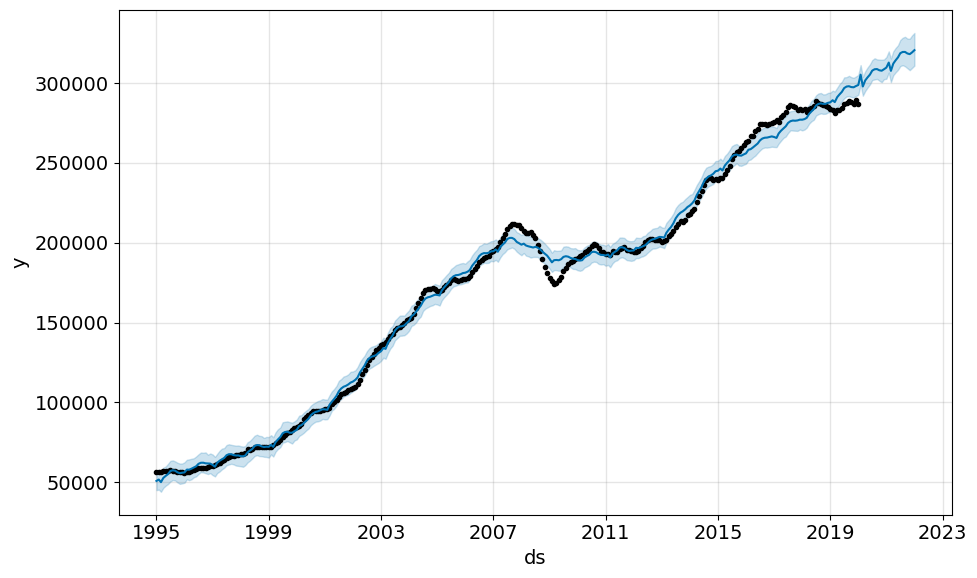

In [71]:
# Prepare the 
model_df_o = pd.DataFrame(out_flag_mean_price).reset_index()
model_df_o = model_df_o.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m1 = Prophet()
m1.fit(model_df_o)

future = m1.make_future_dataframe(periods=24, freq='M')

forecast = m1.predict(future)

# Visualise the prediction
fig2 = m1.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Mehrad Tavanamehr\.conda\envs\profit_graph\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



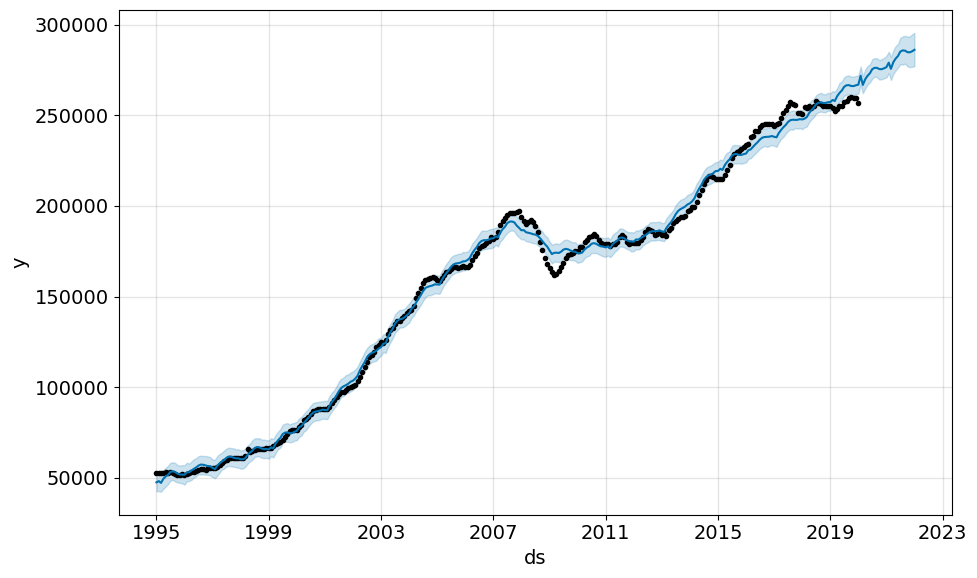

In [69]:
# Prepare the 
model_df_a = pd.DataFrame(around_england_mean_price).reset_index()
model_df_a = model_df_a.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m2 = Prophet()
m2.fit(model_df_a)

future = m2.make_future_dataframe(periods=24, freq='M')

forecast = m2.predict(future)

# Visualise the prediction
fig3 = m2.plot(forecast)